## DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. 

1. Set up at least three different blob configurations
2. Run the four methods ( 𝑘-means, mean shift, spectral clustering and affinity propagation) on each one. 
3. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

### 1. Set up at least three different blob configurations

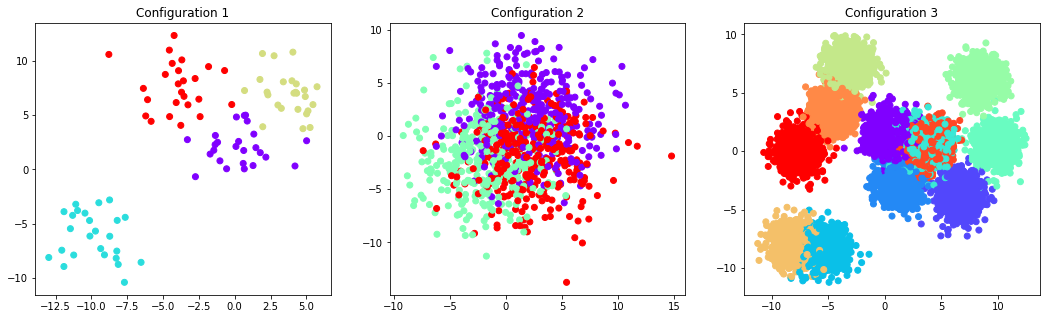

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


from sklearn import metrics
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth,SpectralClustering,AffinityPropagation


from sklearn.datasets import make_blobs
%matplotlib inline


# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]



# Create data - configuration 1
X1, y1 = make_blobs(n_samples=100, 
                    n_features=2, 
                    centers=4,
                    cluster_std=1.8,
                    random_state=101)



# Create data - configuration 2
X2, y2 = make_blobs(n_samples=1000,
                    n_features=100, 
                    centers=centers,
                    cluster_std=3,
                    random_state=101)



# Create data - configuration 3
X3, y3 = make_blobs(n_samples=10000,
                    n_features=5, 
                    centers=12,
                    cluster_std=1,
                    random_state=101)

#Scatter plots of 3 configurations

plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1,cmap='rainbow')
plt.title('Configuration 1')

plt.subplot(1,3,2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,cmap='rainbow')
plt.title('Configuration 2')

plt.subplot(1,3,3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3,cmap='rainbow')
plt.title('Configuration 3')
plt.show()

### 2. Run the four methods ( 𝑘-means, mean shift, spectral clustering and affinity propagation) on each one. 

####  𝑘-means

In [2]:
def kmeans_method(X,y,clusters,configuration):
    
    '''
      Arguments: X and y set, number of centers into the blob and configuration #
      Return:    Results of predictions of k-mean algorithm, taking a 100% of the dataset
                 as test size. 
    '''
    
  
    start_time = time.time()
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(X)

    #Printing runtime
    print("--- Runtime: %s seconds ---" % (time.time() - start_time))
    title = 'Original configuration ' + str(configuration)
    
    plt.figure(figsize=(18,5))

    plt.subplot(1,2,1)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

    plt.subplot(1,2,2)
    plt.title('K-means') 
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')

    plt.show()
    
 
    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(kmeans.labels_, y))


--- Runtime: 0.017266273498535156 seconds ---


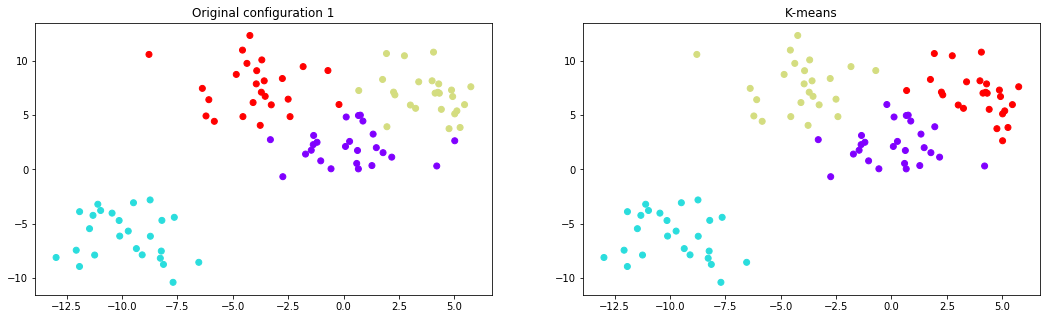

Comparing k-means clusters against the data:
col_0   0   1   2   3
row_0                
0      24   0   1   1
1       0  25   0   0
2       0   0   0  24
3       1   0  24   0


In [3]:
#Configuration 1
kmeans_method(X1,y1,4,1)

--- Runtime: 0.04587507247924805 seconds ---


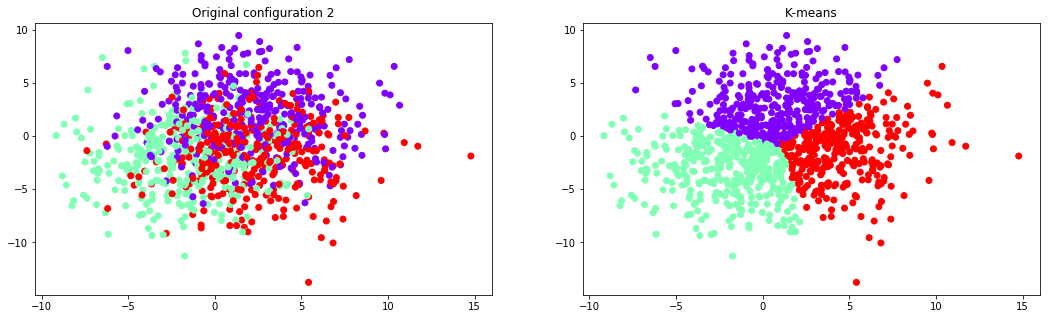

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      197   63   76
1       36  228  104
2      101   42  153


In [4]:
#Configuration 2
kmeans_method(X2,y2,3,2)

--- Runtime: 0.11619305610656738 seconds ---


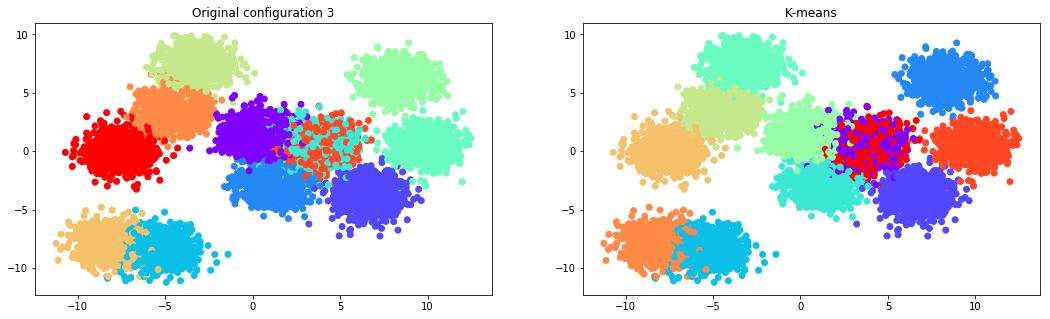

Comparing k-means clusters against the data:
col_0   0    1    2    3    4    5    6    7    8    9    10   11
row_0                                                            
0        0    0    0    0  833    0    0    0    0    0    0    0
1        0  834    0    0    0    0    0    0    0    0    0    0
2        0    0    0    0    0    0  833    0    0    0    0    0
3        0    0    0  830    0    0    0    0    4    0    0    0
4        0    0  834    0    0    0    0    0    0    0    0    0
5        0    0    0    0    0    0    0  833    0    0    0    0
6      818    0    0    0    0    0    0    0    0    0   19    0
7        0    0    0    0    0    0    0    0    0  833    0    0
8        0    0    0    0    0    0    0    0    0    0    0  833
9        0    0    0    4    0    0    0    0  829    0    0    0
10       0    0    0    0    0  833    0    0    0    0    0    0
11      16    0    0    0    0    0    0    0    0    0  814    0


In [5]:
#Configuration 3
kmeans_method(X3,y3,12,3)

#### Mean shift method

In [6]:
def mean_shift(X,y,configuration,samples):

    
    '''
      Arguments: X and y set, blob configuration number and number of samples (this number is
                 the half of the n_samples of blob)
      Return:    Results of predictions of mean-shuft algorithm, taking a 100% of the dataset
                 as test size. 
    '''
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=1,
        random_state=42)

    # Set the bandwidth
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=samples)

    #Set start time
    start_time = time.time()
    
    # Declare the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

    #Fit the model
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    #Printing runtime
    print("--- Runtime: %s seconds ---" % (time.time() - start_time))
    
    
    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {} ".format(n_clusters_))

    title = 'Original configuration ' + str(configuration)
    plt.figure(figsize=(18,5))


    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='rainbow')
    plt.title(title)

    plt.subplot(1,2,2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.title('Predictions Mean shift')
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))
    

--- Runtime: 0.020822763442993164 seconds ---
Number of estimated clusters: 4 


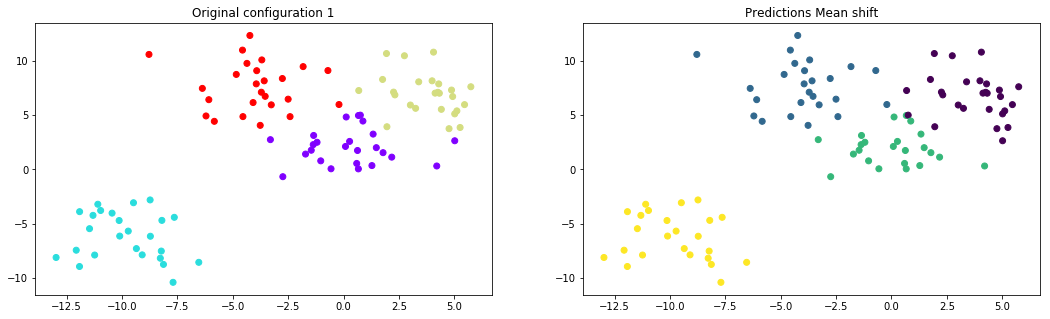

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3
row_0                
0       2   0  23   0
1       0   0   0  24
2      25   0   0   0
3       0  25   0   0


In [7]:
#Conf 1
mean_shift(X1,y1,1,50)

--- Runtime: 0.09509921073913574 seconds ---
Number of estimated clusters: 2 


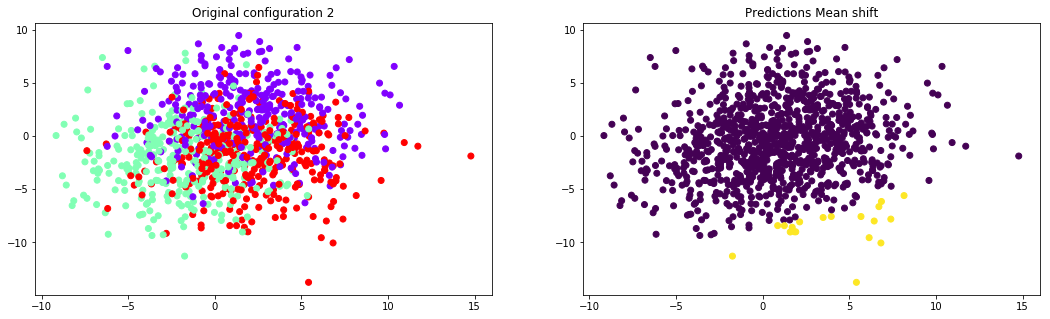

Comparing the assigned categories to the ones in the data:
col_0    0   1
row_0         
0      334   0
1      329   3
2      317  16


In [8]:
#Conf 2
mean_shift(X2,y2,2,500)

--- Runtime: 0.22995305061340332 seconds ---
Number of estimated clusters: 2 


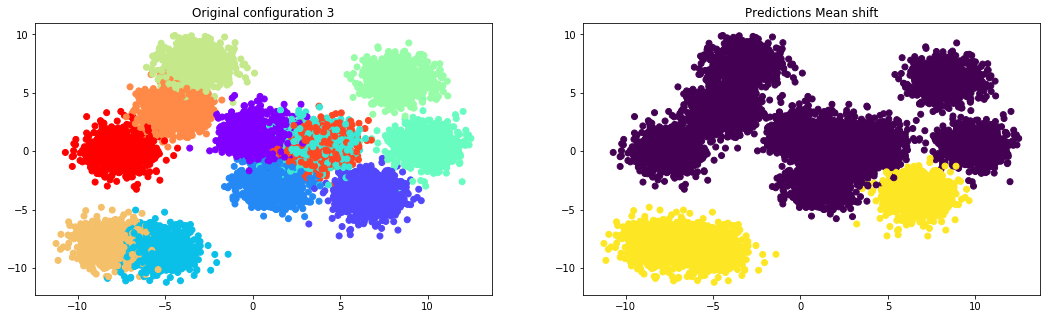

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      834    0
1        0  834
2      834    0
3        0  834
4      833    0
5      830    2
6      833    0
7      833    0
8        0  833
9      833    0
10     833    0
11     833    0


In [9]:
#Conf 3
mean_shift(X3,y3,3,5000)

#### Spectral Clustering

In [10]:
def spectral_clustering(X,y,clusters,configuration):

    '''
    Arguments: X and y set, number of clusters (based on number of centers into the blob) 
               and configuration #
    Return:    Results of predictions of spectral clustering algorithm, taking a 100% of the dataset
               as test size. 
    '''

    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1,random_state=42)
    
    # Number of clusters based on number of configured centers into the blob
    n_clusters=clusters
    
    #set start time
    start_time = time.time()
    
    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)
    
    #Printing runtime
    print("--- Runtime: %s seconds ---" % (time.time() - start_time))
    
    title = 'Original configuration ' + str(configuration)
    plt.figure(figsize=(18,5))
    

    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y ,cmap='rainbow')
    plt.title(title)

    plt.subplot(1,2,2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.title('Predictions spectral clustering')
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    
 

--- Runtime: 0.07790088653564453 seconds ---


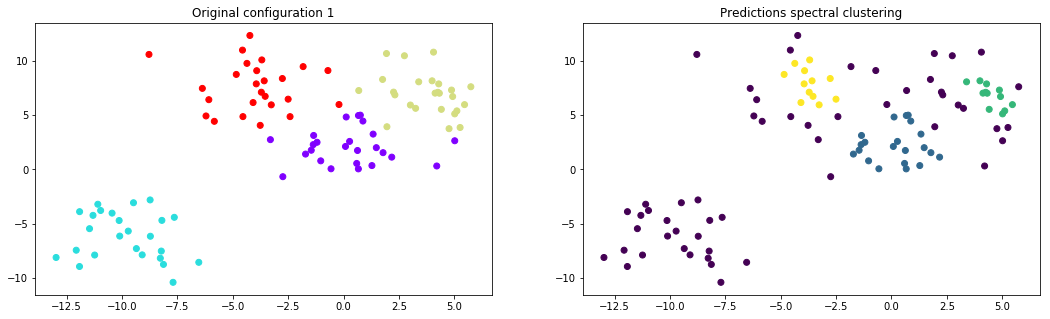

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3
row_0                
0       4  21   0   0
1      24   0   0   0
2      13   0  12   0
3      13   0   0  12


In [11]:
#Configuration 1
spectral_clustering(X1,y1,4,1)

--- Runtime: 0.29784703254699707 seconds ---


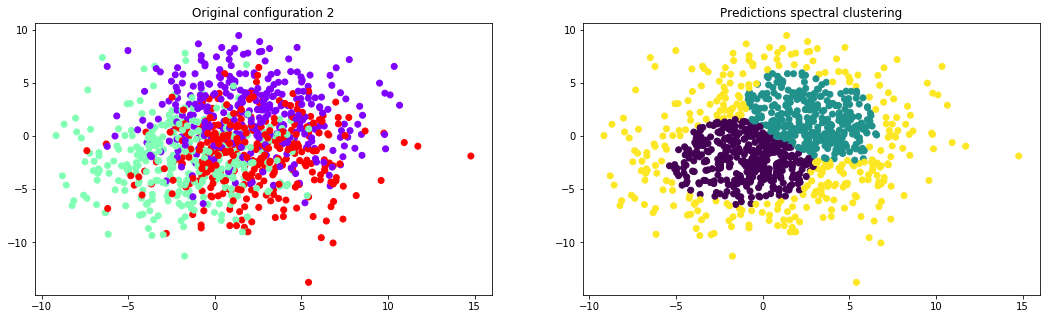

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       51  171  112
1      188   38  106
2      130  109   94


In [12]:
#Configuration 2
spectral_clustering(X2,y2,3,2)

--- Runtime: 40.3375039100647 seconds ---


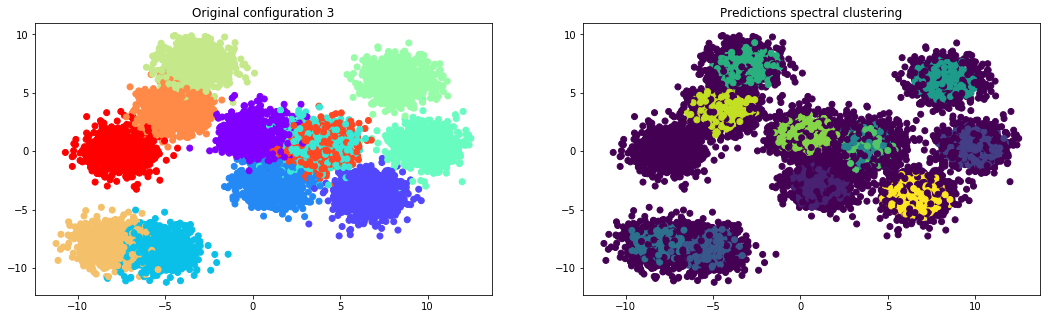

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3    4    5    6    7    8    9    10   11
row_0                                                            
0      413    0    0    0    0    3    0    0    0  418    0    0
1      398    0    0    0    0    0    0    0    0    0    0  436
2      368  466    0    0    0    0    0    0    0    0    0    0
3      379    0    0  455    0    0    0    0    0    0    0    0
4      394    0    0    0    0    0    0    0  439    0    0    0
5      367    0  465    0    0    0    0    0    0    0    0    0
6      391    0    0    0    0    0  442    0    0    0    0    0
7      373    0    0    0    0    0    0  460    0    0    0    0
8      404    0    0    0  429    0    0    0    0    0    0    0
9      384    0    0    0    0    0    0    0    0    0  449    0
10     374    0    0    0    0  457    0    0    0    2    0    0
11     833    0    0    0    0    0    0    0    0    0    0    0


In [13]:
#Configuration 3
spectral_clustering(X3,y3,12,3)

#### Affinity propagation

In [14]:
def affinitypropagaton(X,y,configuration):
    
    '''
    Arguments: X and y sets, and configuration number
    Return: Results of predictions from spectral clustering algorithm
    '''
    
    
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1,random_state=42)
    
    #Set start time 
    start_time = time.time()

    af = AffinityPropagation().fit(X_train)
  
    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_


     #Printing runtime
    print("--- Runtime: %s seconds ---" % (time.time() - start_time))

    print('Estimated number of clusters: {}'.format(n_clusters_))
    
    title='Original configuration ' + str(configuration)
    
    plt.figure(1)
    plt.scatter(X[:, 0], X[:, 1], c=y ,cmap='rainbow')
    plt.title(title)
    plt.show()
    
    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()
    
    

--- Runtime: 0.011795759201049805 seconds ---
Estimated number of clusters: 8


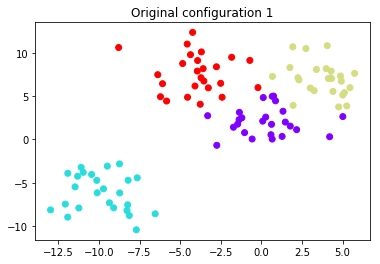

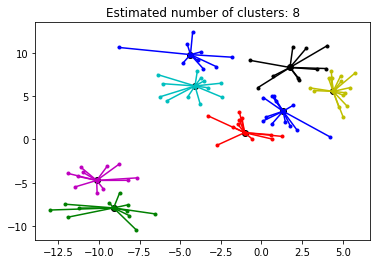

In [15]:
#Configuration 1

affinitypropagaton(X1,y1,1)

--- Runtime: 2.5277340412139893 seconds ---
Estimated number of clusters: 62


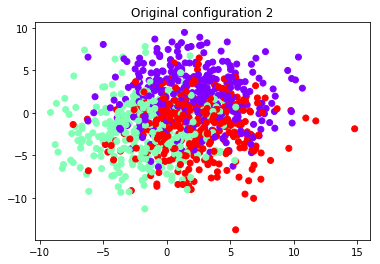

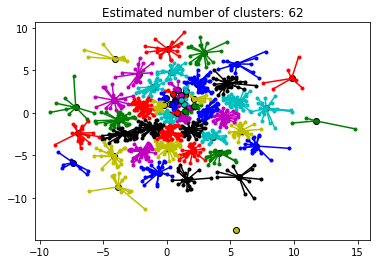

In [16]:
#Configuration 2

affinitypropagaton(X2,y2,2)

--- Runtime: 262.60475492477417 seconds ---
Estimated number of clusters: 530


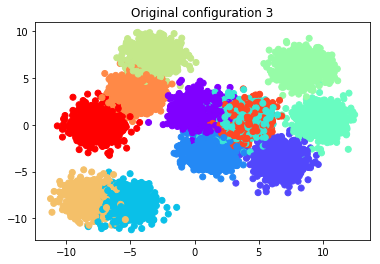

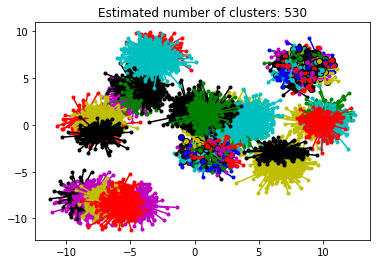

In [17]:
### Configuration 3

affinitypropagaton(X3,y3,3)

## Conclusions:

- Parameters adjustment for every algorithm is a very important activity to get more accurate predictions

- It's very important the standard deviation in every blob. For those blobs which configurations is closer to 1, more accuracy are the predictions

- Less number of features, better predictions. More number of features, more innacurate predictions

- At the moment to run affinity propagation with a dataset with 12 centers and 10000 samples, it took a lot of time to compute it (4 and half minutes aprox.). It's a proof that this algorithm overestimates the number of clusters, 530 for this case. 

_________________________

By: Wendy Navarrete

August, 2019